In [140]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import sleep
from time import time 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7af3fc99-c526-4b55-95ef-530914886cf6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-07-28T13:54:44.560Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 10041}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11617, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [64]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [54]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [66]:
df

id                                   name    symbol  \
0       1                                Bitcoin       BTC   
1    1027                               Ethereum       ETH   
2     825                            Tether USDt      USDT   
3    5426                                 Solana       SOL   
4    1839                                    BNB       BNB   
5    3408                                   USDC      USDC   
6      52                                    XRP       XRP   
7      74                               Dogecoin      DOGE   
8   11419                                Toncoin       TON   
9    2010                                Cardano       ADA   
10   1958                                   TRON       TRX   
11   5805                              Avalanche      AVAX   
12   5994                              Shiba Inu      SHIB   
13   1975                              Chainlink      LINK   
14   6636                               Polkadot       DOT   
15   1831                           Bitcoin Cash       BCH   
16   6535                          NEAR Protocol      NEAR   
17   3957                           UNUS SED LEO       LEO   
18      2                               Litecoin       LTC   
19   4943                                    Dai       DAI   
20   3890                                Polygon     MATIC   
21  24478                                   Pepe      PEPE   
22  20396                                  Kaspa       KAS   
23   7083                                Uniswap       UNI   
24   8916                      Internet Computer       ICP   
25   1321                       Ethereum Classic       ETC   
26  21794                                  Aptos       APT   
27   3773  Artificial Superintelligence Alliance       FET   
28    328                                 Monero       XMR   
29    512                                Stellar       XLM   
30   4847                                 Stacks       STX   
31  27075                                 Mantle       MNT   
32   2280                               Filecoin       FIL   
33   5690                                 Render    RENDER   
34   3794                                 Cosmos      ATOM   
35   4642                                 Hedera      HBAR   
36  28752                              dogwifhat       WIF   
37   3897                                    OKB       OKB   
38   1518                                  Maker       MKR   
39  11841                               Arbitrum       ARB   
40   3635                                 Cronos       CRO   
41  22974                              Bittensor       TAO   
42   7226                              Injective       INJ   
43  10603                              Immutable       IMX   
44   3077                                VeChain       VET   
45   5632                                Arweave        AR   
46  26081                      First Digital USD     FDUSD   
47  23095                                   Bonk      BONK   
48  20947                                    Sui       SUI   
49  11840                               Optimism        OP   
50   6719                              The Graph       GRT   
51  10804                                  FLOKI     FLOKI   
52  11092                           Bitget Token       BGB   
53   8425                              JasmyCoin     JASMY   
54   4157                              THORChain      RUNE   
55  29210                                Jupiter       JUP   
56   7278                                   Aave      AAVE   
57   2416                          Theta Network     THETA   
58   8000                               Lido DAO       LDO   
59  28850                                Notcoin       NOT   
60  28177                           Pyth Network      PYTH   
61  21159                                   Ondo      ONDO   
62  29743                          Brett (Based)     BRETT   
63   3513                              

In [58]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7af3fc99-c526-4b55-95ef-530914886cf6',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\volka\OneDrive\Masaüstü\Data Analytics\PortfolioProjects\PYTHON\crypto api csv files\CryptoAPIData.csv'):
        df.to_csv(r'C:\Users\volka\OneDrive\Masaüstü\Data Analytics\PortfolioProjects\PYTHON\crypto api csv files\CryptoAPIData.csv',header = 'column_name',index = False)
    else:
        df.to_csv(r'C:\Users\volka\OneDrive\Masaüstü\Data Analytics\PortfolioProjects\PYTHON\crypto api csv files\CryptoAPIData.csv', mode = 'a',header = False, index = False)

In [68]:
for i in range(1440):
    api_runner()
    print(str(i+1) + '.', 'api_runner() worked succesfully!')
    sleep(60)
exit()    

1. api_runner() worked succesfully!
2. api_runner() worked succesfully!
3. api_runner() worked succesfully!
4. api_runner() worked succesfully!


KeyboardInterrupt: 

In [96]:
df3 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Data Analytics\PortfolioProjects\PYTHON\crypto api csv files\CryptoAPIData.csv")
df3

id                                   name    symbol  \
0        1                                Bitcoin       BTC   
1     1027                               Ethereum       ETH   
2      825                            Tether USDt      USDT   
3     5426                                 Solana       SOL   
4     1839                                    BNB       BNB   
5     3408                                   USDC      USDC   
6       52                                    XRP       XRP   
7       74                               Dogecoin      DOGE   
8    11419                                Toncoin       TON   
9     2010                                Cardano       ADA   
10    1958                                   TRON       TRX   
11    5805                              Avalanche      AVAX   
12    5994                              Shiba Inu      SHIB   
13    1975                              Chainlink      LINK   
14    6636                               Polkadot       DOT   
15    1831                           Bitcoin Cash       BCH   
16    6535                          NEAR Protocol      NEAR   
17    3957                           UNUS SED LEO       LEO   
18       2                               Litecoin       LTC   
19    4943                                    Dai       DAI   
20    3890                                Polygon     MATIC   
21   24478                                   Pepe      PEPE   
22   20396                                  Kaspa       KAS   
23    7083                                Uniswap       UNI   
24    8916                      Internet Computer       ICP   
25    1321                       Ethereum Classic       ETC   
26   21794                                  Aptos       APT   
27    3773  Artificial Superintelligence Alliance       FET   
28     328                                 Monero       XMR   
29     512                                Stellar       XLM   
30    4847                                 Stacks       STX   
31   27075                                 Mantle       MNT   
32    2280                               Filecoin       FIL   
33    5690                                 Render    RENDER   
34    3794                                 Cosmos      ATOM   
35    4642                                 Hedera      HBAR   
36   28752                              dogwifhat       WIF   
37    3897                                    OKB       OKB   
38    1518                                  Maker       MKR   
39   11841                               Arbitrum       ARB   
40    3635                                 Cronos       CRO   
41   22974                              Bittensor       TAO   
42    7226                              Injective       INJ   
43   10603                              Immutable       IMX   
44    3077                                VeChain       VET   
45    5632                                Arweave        AR   
46   26081                      First Digital USD     FDUSD   
47   23095                                   Bonk      BONK   
48   20947                                    Sui       SUI   
49   11840                               Optimism        OP   
50    6719                              The Graph       GRT   
51   10804                                  FLOKI     FLOKI   
52   11092                           Bitget Token       BGB   
53    8425                              JasmyCoin     JASMY   
54    4157                              THORChain      RUNE   
55   29210                                Jupiter       JUP   
56    7278                                   Aave      AAVE   
57    2416                          Theta Network     THETA   
58    8000                               Lido DAO       LDO   
59   28850                                Notcoin       NOT   
60   28177                           Pyth Network      PYTH   
61   21159                                   Ondo      ONDO   
62   29743                          Bre

In [102]:
df4 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only=True)
df4

quote.USD.percent_change_1h  \
name                                                                 
Bitcoin                                                    0.15542   
Ethereum                                                   0.19436   
Tether USDt                                                0.00281   
Solana                                                     0.13661   
BNB                                                       -0.08548   
USDC                                                       0.00494   
XRP                                                       -0.33657   
Dogecoin                                                  -0.47982   
Toncoin                                                   -0.19292   
Cardano                                                   -0.23588   
TRON                                                      -0.04810   
Avalanche                                                 -0.77376   
Shiba Inu                                                 -0.30385   
Chainlink                                                  0.09263   
Polkadot                                                  -0.09846   
Bitcoin Cash                                               0.03750   
NEAR Protocol                                             -0.32841   
UNUS SED LEO                                               0.11975   
Litecoin                                                   0.00815   
Dai                                                        0.00390   
Polygon                                                   -0.55879   
Pepe                                                      -0.28892   
Kaspa                                                      0.38052   
Uniswap                                                   -0.07309   
Internet Computer                                         -0.54199   
Ethereum Classic                                           0.01536   
Aptos                                                     -0.17122   
Artificial Superintelligence Alliance                     -0.12294   
Monero                                                     0.80851   
Stellar                                                   -0.34106   
Stacks                                                    -0.08946   
Mantle                                                    -0.01763   
Filecoin                                                  -0.21877   
Render                                                     0.02742   
Cosmos                                                    -0.14703   
Hedera                                                    -0.20922   
dogwifhat                                                 -1.59804   
OKB                                                        0.11003   
Maker                                                      0.46571   
Arbitrum                                                  -0.22833   
Cronos                                                     0.07795   
Bittensor                                                 -0.41376   
Injective                                                  0.41259   
Immutable                                                 -0.49639   
VeChain                                                   -0.18054   
Arweave                                                   -0.26763   
First Digital USD                                         -0.00828   
Bonk                                                      -0.61420   
Sui                                                       -0.33884   
Optimism                                                  -0.19515   
The Graph                                                 -0.30477   
FLOKI                                                     -0.48243   
Bitget Token                                               0.27388   
JasmyCoin                                                 -1.24572   
THORChain                                                 -0.22957   
Jupiter                                          

In [104]:
df5 = df4.stack()
df5

name                                                               
Bitcoin                                quote.USD.percent_change_1h      0.15542
                                       quote.USD.percent_change_24h    -0.60904
                                       quote.USD.percent_change_7d      1.62513
                                       quote.USD.percent_change_30d    10.50448
                                       quote.USD.percent_change_60d     0.33734
                                       quote.USD.percent_change_90d     8.86926
Ethereum                               quote.USD.percent_change_1h      0.19436
                                       quote.USD.percent_change_24h    -0.64751
                                       quote.USD.percent_change_7d     -6.58115
                                       quote.USD.percent_change_30d    -5.32632
                                       quote.USD.percent_change_60d   -14.09040
                                       quote.USD.per

In [108]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                                                        
Bitcoin                               quote.USD.percent_change_1h    0.15542
                                      quote.USD.percent_change_24h  -0.60904
                                      quote.USD.percent_change_7d    1.62513
                                      quote.USD.percent_change_30d  10.50448
                                      quote.USD.percent_change_60d   0.33734
                                      quote.USD.percent_change_90d   8.86926
Ethereum                              quote.USD.percent_change_1h    0.19436
                                      quote.USD.percent_change_24h  -0.64751
                                      quote.USD.percent_change_7d   -6.58115
                                      quote.USD.percent_change_30d  -5.32632
                                      quote.USD.percent_change_60d -14.09040
                                      quote.USD.percent_change_90d   3.38358
Tether USDt                           quote.USD.percent_change_1h    0.00281
                                      quote.USD.percent_change_24h  -0.02988
                                      quote.USD.percent_change_7d   -0.03632
                                      quote.USD.percent_change_30d   0.06459
                                      quote.USD.percent_change_60d   0.08738
                                      quote.USD.percent_change_90d   0.02566
Solana                                quote.USD.percent_change_1h    0.13661
                                      quote.USD.percent_change_24h  -0.20369
                                      quote.USD.percent_change_7d    7.62926
                                      quote.USD.percent_change_30d  27.91196
                                      quote.USD.percent_change_60d  10.85274
                                      quote.USD.percent_change_90d  37.63241
BNB                                   quote.USD.percent_change_1h   -0.08548
                                      quote.USD.percent_change_24h  -1.15879
                                      quote.USD.percent_change_7d   -2.25623
                                      quote.USD.percent_change_30d   0.72596
                                      quote.USD.percent_change_60d  -2.87319
                                      quote.USD.percent_change_90d  -1.09782
USDC                                  quote.USD.percent_change_1h    0.00494
                                      quote.USD.percent_change_24h  -0.01846
                                      quote.USD.percent_change_7d    0.00472
                                      quote.USD.percent_change_30d  -0.04342
                                      quote.USD.percent_change_60d  -0.00704
                                      quote.USD.percent_change_90d   0.00296
XRP                                   quote.USD.percent_change_1h   -0.33657
                                      quote.USD.percent_change_24h   0.13677
                                      quote.USD.percent_change_7d    3.31845
                                      quote.USD.percent_change_30d  25.77523
                                      quote.USD.percent_change_60d  14.00886
                                      quote.USD.percent_change_90d  18.91073
Dogecoin                              quote.USD.percent_change_1h   -0.47982
                                      quote.USD.percent_change_24h  -3.34265
                                      quote.USD.percent_change_7d   -0.56074
                                      quote.USD.percent_change_30d   2.97630
                                      quote.USD.percent_change_60d -20.24867
                                      quote.USD.percent_change_90d  -7.30076
Toncoin                               quote.USD.percent_change_1h   -0.19292
                                      quote.USD.percent_change_24h  -2.55346
                                      quote.USD.percent_change_7d 

In [110]:
df6.count()

values    600
dtype: int64

In [114]:
index = pd.Index(range(600))

In [128]:
df7 = df6.set_index(index)
df7 = df6.reset_index()
df7

name                       level_1  \
0                                  Bitcoin   quote.USD.percent_change_1h   
1                                  Bitcoin  quote.USD.percent_change_24h   
2                                  Bitcoin   quote.USD.percent_change_7d   
3                                  Bitcoin  quote.USD.percent_change_30d   
4                                  Bitcoin  quote.USD.percent_change_60d   
5                                  Bitcoin  quote.USD.percent_change_90d   
6                                 Ethereum   quote.USD.percent_change_1h   
7                                 Ethereum  quote.USD.percent_change_24h   
8                                 Ethereum   quote.USD.percent_change_7d   
9                                 Ethereum  quote.USD.percent_change_30d   
10                                Ethereum  quote.USD.percent_change_60d   
11                                Ethereum  quote.USD.percent_change_90d   
12                             Tether USDt   quote.USD.percent_change_1h   
13                             Tether USDt  quote.USD.percent_change_24h   
14                             Tether USDt   quote.USD.percent_change_7d   
15                             Tether USDt  quote.USD.percent_change_30d   
16                             Tether USDt  quote.USD.percent_change_60d   
17                             Tether USDt  quote.USD.percent_change_90d   
18                                  Solana   quote.USD.percent_change_1h   
19                                  Solana  quote.USD.percent_change_24h   
20                                  Solana   quote.USD.percent_change_7d   
21                                  Solana  quote.USD.percent_change_30d   
22                                  Solana  quote.USD.percent_change_60d   
23                                  Solana  quote.USD.percent_change_90d   
24                                     BNB   quote.USD.percent_change_1h   
25                                     BNB  quote.USD.percent_change_24h   
26                                     BNB   quote.USD.percent_change_7d   
27                                     BNB  quote.USD.percent_change_30d   
28                                     BNB  quote.USD.percent_change_60d   
29                                     BNB  quote.USD.percent_change_90d   
30                                    USDC   quote.USD.percent_change_1h   
31                                    USDC  quote.USD.percent_change_24h   
32                                    USDC   quote.USD.percent_change_7d   
33                                    USDC  quote.USD.percent_change_30d   
34                                    USDC  quote.USD.percent_change_60d   
35                                    USDC  quote.USD.percent_change_90d   
36                                     XRP   quote.USD.percent_change_1h   
37                                     XRP  quote.USD.percent_change_24h   
38                                     XRP   quote.USD.percent_change_7d   
39                                     XRP  quote.USD.percent_change_30d   
40                                     XRP  quote.USD.percent_change_60d   
41                                     XRP  quote.USD.percent_change_90d   
42                                Dogecoin   quote.USD.percent_change_1h   
43                                Dogecoin  quote.USD.percent_change_24h   
44                                Dogecoin   quote.USD.percent_change_7d   
45                                Dogecoin  quote.USD.percent_change_30d   
46                                Dogecoin  quote.USD.percent_change_60d   
47                                Dogecoin  quote.USD.percent_change_90d   
48                                 Toncoin   quote.USD.percent_change_1h   
49                                 Toncoin  quote.USD.percent_change_24h   
50                                 Toncoin   quote.USD.percent_change_7d   
51                                 Toncoin  quote.USD.percent_change_30d   
52        

In [130]:
df8 = df7.rename(columns = {'level_1':'percent_change'})
df8

name                percent_change  \
0                                  Bitcoin   quote.USD.percent_change_1h   
1                                  Bitcoin  quote.USD.percent_change_24h   
2                                  Bitcoin   quote.USD.percent_change_7d   
3                                  Bitcoin  quote.USD.percent_change_30d   
4                                  Bitcoin  quote.USD.percent_change_60d   
5                                  Bitcoin  quote.USD.percent_change_90d   
6                                 Ethereum   quote.USD.percent_change_1h   
7                                 Ethereum  quote.USD.percent_change_24h   
8                                 Ethereum   quote.USD.percent_change_7d   
9                                 Ethereum  quote.USD.percent_change_30d   
10                                Ethereum  quote.USD.percent_change_60d   
11                                Ethereum  quote.USD.percent_change_90d   
12                             Tether USDt   quote.USD.percent_change_1h   
13                             Tether USDt  quote.USD.percent_change_24h   
14                             Tether USDt   quote.USD.percent_change_7d   
15                             Tether USDt  quote.USD.percent_change_30d   
16                             Tether USDt  quote.USD.percent_change_60d   
17                             Tether USDt  quote.USD.percent_change_90d   
18                                  Solana   quote.USD.percent_change_1h   
19                                  Solana  quote.USD.percent_change_24h   
20                                  Solana   quote.USD.percent_change_7d   
21                                  Solana  quote.USD.percent_change_30d   
22                                  Solana  quote.USD.percent_change_60d   
23                                  Solana  quote.USD.percent_change_90d   
24                                     BNB   quote.USD.percent_change_1h   
25                                     BNB  quote.USD.percent_change_24h   
26                                     BNB   quote.USD.percent_change_7d   
27                                     BNB  quote.USD.percent_change_30d   
28                                     BNB  quote.USD.percent_change_60d   
29                                     BNB  quote.USD.percent_change_90d   
30                                    USDC   quote.USD.percent_change_1h   
31                                    USDC  quote.USD.percent_change_24h   
32                                    USDC   quote.USD.percent_change_7d   
33                                    USDC  quote.USD.percent_change_30d   
34                                    USDC  quote.USD.percent_change_60d   
35                                    USDC  quote.USD.percent_change_90d   
36                                     XRP   quote.USD.percent_change_1h   
37                                     XRP  quote.USD.percent_change_24h   
38                                     XRP   quote.USD.percent_change_7d   
39                                     XRP  quote.USD.percent_change_30d   
40                                     XRP  quote.USD.percent_change_60d   
41                                     XRP  quote.USD.percent_change_90d   
42                                Dogecoin   quote.USD.percent_change_1h   
43                                Dogecoin  quote.USD.percent_change_24h   
44                                Dogecoin   quote.USD.percent_change_7d   
45                                Dogecoin  quote.USD.percent_change_30d   
46                                Dogecoin  quote.USD.percent_change_60d   
47                                Dogecoin  quote.USD.percent_change_90d   
48                                 Toncoin   quote.USD.percent_change_1h   
49                                 Toncoin  quote.USD.percent_change_24h   
50                                 Toncoin   quote.USD.percent_change_7d   
51                                 Toncoin  quote.USD.percent_change_30d   
52        

In [136]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

name percent_change    values
0                                  Bitcoin             1h   0.15542
1                                  Bitcoin            24h  -0.60904
2                                  Bitcoin             7d   1.62513
3                                  Bitcoin            30d  10.50448
4                                  Bitcoin            60d   0.33734
5                                  Bitcoin            90d   8.86926
6                                 Ethereum             1h   0.19436
7                                 Ethereum            24h  -0.64751
8                                 Ethereum             7d  -6.58115
9                                 Ethereum            30d  -5.32632
10                                Ethereum            60d -14.09040
11                                Ethereum            90d   3.38358
12                             Tether USDt             1h   0.00281
13                             Tether USDt            24h  -0.02988
14                             Tether USDt             7d  -0.03632
15                             Tether USDt            30d   0.06459
16                             Tether USDt            60d   0.08738
17                             Tether USDt            90d   0.02566
18                                  Solana             1h   0.13661
19                                  Solana            24h  -0.20369
20                                  Solana             7d   7.62926
21                                  Solana            30d  27.91196
22                                  Solana            60d  10.85274
23                                  Solana            90d  37.63241
24                                     BNB             1h  -0.08548
25                                     BNB            24h  -1.15879
26                                     BNB             7d  -2.25623
27                                     BNB            30d   0.72596
28                                     BNB            60d  -2.87319
29                                     BNB            90d  -1.09782
30                                    USDC             1h   0.00494
31                                    USDC            24h  -0.01846
32                                    USDC             7d   0.00472
33                                    USDC            30d  -0.04342
34                                    USDC            60d  -0.00704
35                                    USDC            90d   0.00296
36                                     XRP             1h  -0.33657
37                                     XRP            24h   0.13677
38                                     XRP             7d   3.31845
39                                     XRP            30d  25.77523
40                                     XRP            60d  14.00886
41                                     XRP            90d  18.91073
42                                Dogecoin             1h  -0.47982
43                                Dogecoin            24h  -3.34265
44                                Dogecoin             7d  -0.56074
45                                Dogecoin            30d   2.97630
46                                Dogecoin            60d -20.24867
47                                Dogecoin            90d  -7.30076
48                                 Toncoin             1h  -0.19292
49                                 Toncoin            24h  -2.55346
50                                 Toncoin             7d  -8.43808
51                                 Toncoin            30d -14.34726
52                                 Toncoin            60d   1.06171
53                                 Toncoin            90d  24.63794
54                                 Cardano             1h  -0.23588
55                                 Cardano            24h  -1.98361
56                                 Cardano             7d  -4.30228
57                                 Cardano            30d   5.38779
58                        

C:\Users\volka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


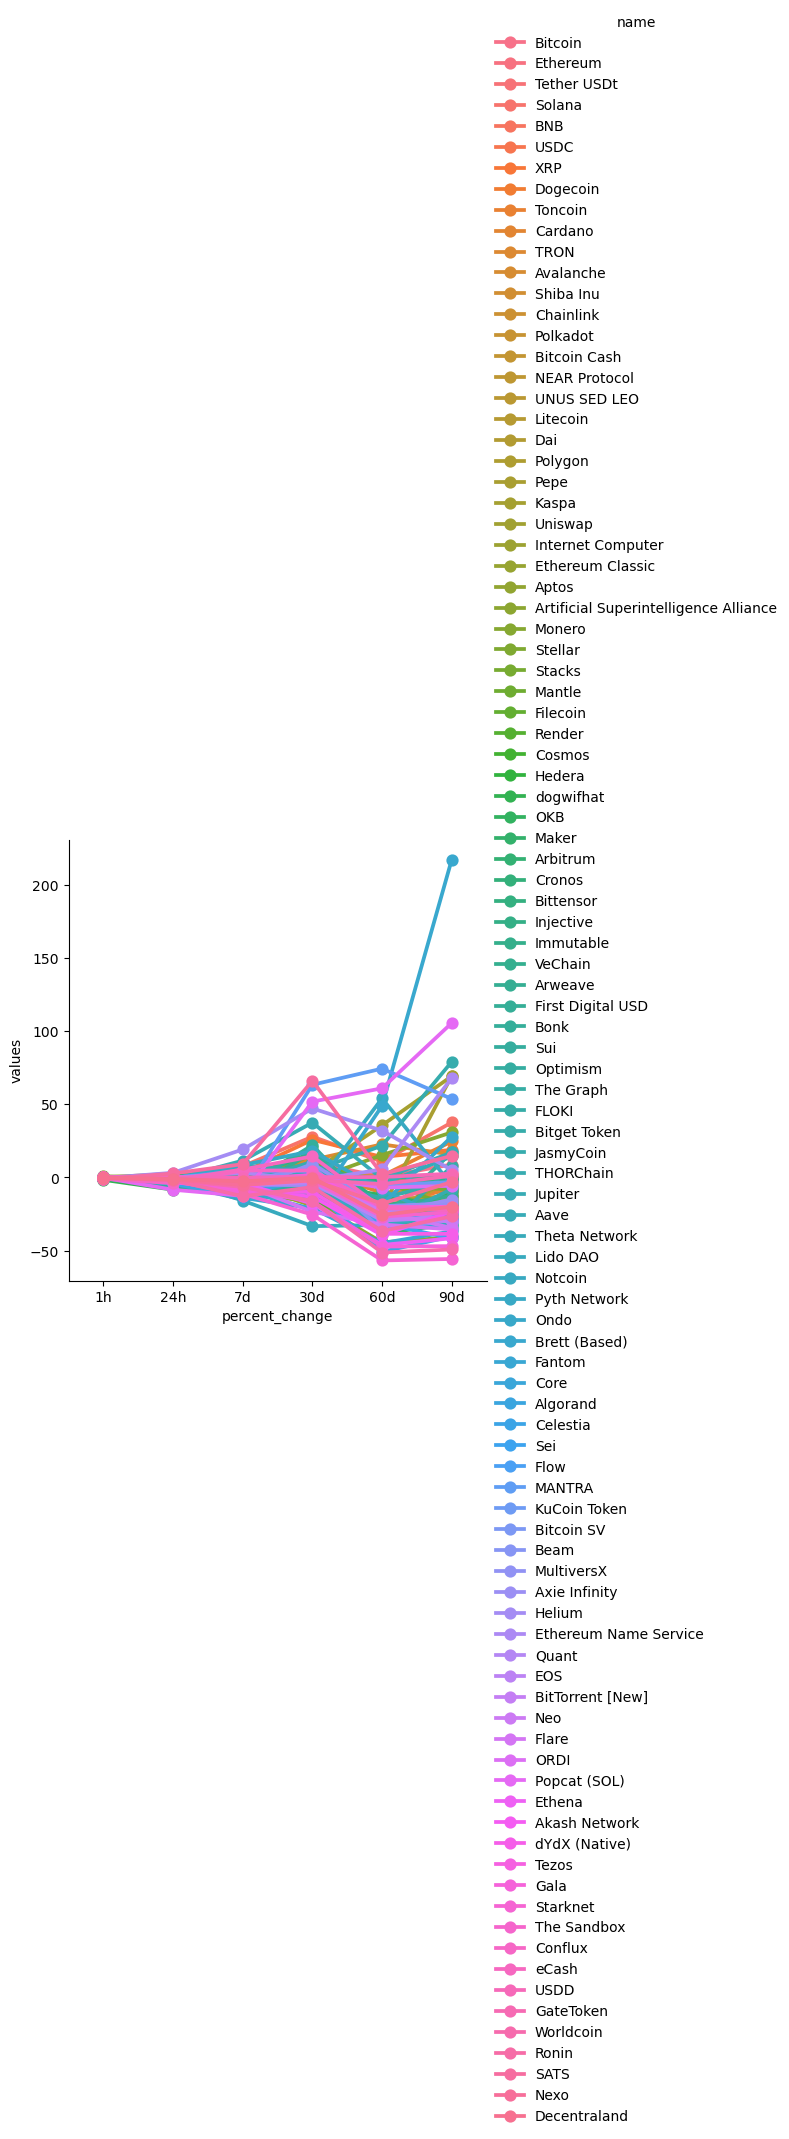

In [144]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [158]:
df12 = df3[['name','quote.USD.price','timestamp']]
df12 = df12.query("name == 'Bitcoin'")
df12

name  quote.USD.price                   timestamp
0    Bitcoin      67853.65135  2024-07-28 15:31:46.569613
100  Bitcoin      67853.65135  2024-07-28 15:31:57.233598
200  Bitcoin      68047.61263  2024-07-28 15:50:01.016163
300  Bitcoin      68047.61263  2024-07-28 15:50:04.245160
400  Bitcoin      68047.61263  2024-07-28 15:50:05.525238
500  Bitcoin      68047.61263  2024-07-28 15:50:06.936904

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

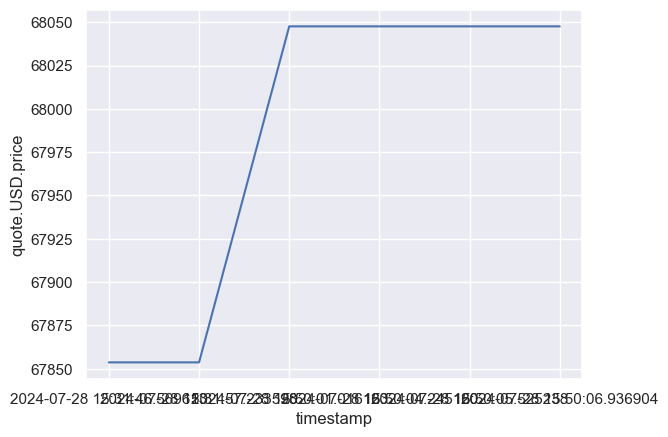

In [160]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df12)

In [162]:
df3

id                                   name    symbol  \
0        1                                Bitcoin       BTC   
1     1027                               Ethereum       ETH   
2      825                            Tether USDt      USDT   
3     5426                                 Solana       SOL   
4     1839                                    BNB       BNB   
5     3408                                   USDC      USDC   
6       52                                    XRP       XRP   
7       74                               Dogecoin      DOGE   
8    11419                                Toncoin       TON   
9     2010                                Cardano       ADA   
10    1958                                   TRON       TRX   
11    5805                              Avalanche      AVAX   
12    5994                              Shiba Inu      SHIB   
13    1975                              Chainlink      LINK   
14    6636                               Polkadot       DOT   
15    1831                           Bitcoin Cash       BCH   
16    6535                          NEAR Protocol      NEAR   
17    3957                           UNUS SED LEO       LEO   
18       2                               Litecoin       LTC   
19    4943                                    Dai       DAI   
20    3890                                Polygon     MATIC   
21   24478                                   Pepe      PEPE   
22   20396                                  Kaspa       KAS   
23    7083                                Uniswap       UNI   
24    8916                      Internet Computer       ICP   
25    1321                       Ethereum Classic       ETC   
26   21794                                  Aptos       APT   
27    3773  Artificial Superintelligence Alliance       FET   
28     328                                 Monero       XMR   
29     512                                Stellar       XLM   
30    4847                                 Stacks       STX   
31   27075                                 Mantle       MNT   
32    2280                               Filecoin       FIL   
33    5690                                 Render    RENDER   
34    3794                                 Cosmos      ATOM   
35    4642                                 Hedera      HBAR   
36   28752                              dogwifhat       WIF   
37    3897                                    OKB       OKB   
38    1518                                  Maker       MKR   
39   11841                               Arbitrum       ARB   
40    3635                                 Cronos       CRO   
41   22974                              Bittensor       TAO   
42    7226                              Injective       INJ   
43   10603                              Immutable       IMX   
44    3077                                VeChain       VET   
45    5632                                Arweave        AR   
46   26081                      First Digital USD     FDUSD   
47   23095                                   Bonk      BONK   
48   20947                                    Sui       SUI   
49   11840                               Optimism        OP   
50    6719                              The Graph       GRT   
51   10804                                  FLOKI     FLOKI   
52   11092                           Bitget Token       BGB   
53    8425                              JasmyCoin     JASMY   
54    4157                              THORChain      RUNE   
55   29210                                Jupiter       JUP   
56    7278                                   Aave      AAVE   
57    2416                          Theta Network     THETA   
58    8000                               Lido DAO       LDO   
59   28850                                Notcoin       NOT   
60   28177                           Pyth Network      PYTH   
61   21159                                   Ondo      ONDO   
62   29743                          Bre